# Setup

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn import metrics

# installable with: `pip install imodels`
import sys,os
sys.path.append(os.path.expanduser('~/imodels'))

import imodels
from imodels import FIGSClassifier
import demo_helper
np.random.seed(13)

Let's start by loading some data in...  
Note, weed to still load the reg dataset first to get the same splits as in `imodels_demo.ipynb` due to the call to random

In [2]:
# ames housing dataset: https://www.openml.org/search?type=data&status=active&id=43926
X_train_reg, X_test_reg, y_train_reg, y_test_reg, feat_names_reg = demo_helper.get_ames_data()

# diabetes dataset: https://www.openml.org/search?type=data&sort=runs&id=37&status=active
X_train, X_test, y_train, y_test, feat_names = demo_helper.get_diabetes_data()
    # feat_names meanings:
    # ["#Pregnant", "Glucose concentration test", "Blood pressure(mmHg)",
    # "Triceps skin fold thickness(mm)",
    # "2-Hour serum insulin (mu U/ml)", "Body mass index", "Diabetes pedigree function", "Age (years)"]

# load some data
# print('Regression data training', X_train_reg.shape, 'Classification data training', X_train.shape)

# FIGS

In [3]:
model_figs = FIGSClassifier(max_rules=7)

In [4]:
# specify a decision tree with a maximum depth
model_figs.fit(X_train, y_train, feature_names=feat_names);

In [5]:
# calculate mse on the training data
# probs = figs.predict_proba(X_test)
# print(f'test mse: {np.mean(np.square(preds-y)):0.2f}')
# demo_helper.viz_classification_preds(probs, y_test)

In [6]:
print(model_figs)

> ------------------------------
> FIGS-Fast Interpretable Greedy-Tree Sums:
> 	Predictions are made by summing the "Val" reached by traversing each tree
> ------------------------------
Glucose concentration test <= 99.500 (Tree #0 root)
	Val: 0.068 (leaf)
	Glucose concentration test <= 168.500 (split)
		#Pregnant <= 6.500 (split)
			Body mass index <= 30.850 (split)
				Val: 0.065 (leaf)
				Blood pressure(mmHg) <= 67.000 (split)
					Val: 0.705 (leaf)
					Val: 0.303 (leaf)
			Val: 0.639 (leaf)
		Blood pressure(mmHg) <= 93.000 (split)
			Val: 0.860 (leaf)
			Val: -0.009 (leaf)

	+
Diabetes pedigree function <= 0.404 (Tree #1 root)
	Val: -0.088 (leaf)
	Val: 0.106 (leaf)



In [7]:
print(model_figs.print_tree(X_train, y_train))

------------
Glucose concentration test <= 99.500 65/192 (33.85%)
	ΔRisk = 0.07 4/59 (6.78%)
	Glucose concentration test <= 168.500 61/133 (45.86%)
		#Pregnant <= 6.500 44/112 (39.29%)
			Body mass index <= 30.850 21/76 (27.63%)
				ΔRisk = 0.06 2/31 (6.45%)
				Blood pressure(mmHg) <= 67.000 19/45 (42.22%)
					ΔRisk = 0.71 10/14 (71.43%)
					ΔRisk = 0.30 9/31 (29.03%)
			ΔRisk = 0.64 23/36 (63.89%)
		Blood pressure(mmHg) <= 93.000 17/21 (80.95%)
			ΔRisk = 0.86 17/19 (89.47%)
			ΔRisk = -0.01 0/2 (0.0%)

	+
Diabetes pedigree function <= 0.404 65/192 (33.85%)
	ΔRisk = -0.09 25/105 (23.81%)
	ΔRisk = 0.11 40/87 (45.98%)



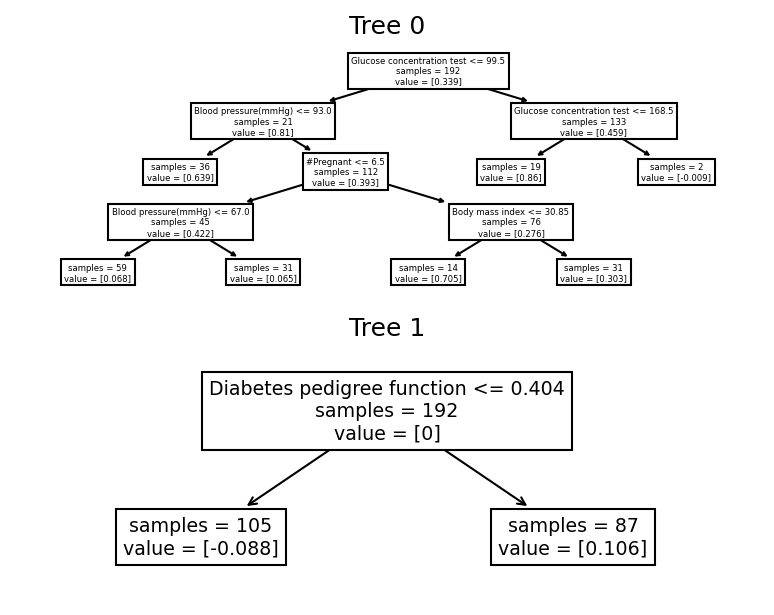

In [8]:
model_figs.plot()